<a href="https://colab.research.google.com/github/nkharlamova/ML/blob/main/!HW_14_Neural_Networks_Dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK: Understand examples of neural networks for classifying the MNIST dataset. Do not use Convolution, only Dense layers as the basis.**

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.regularizers import l2

**Loading the MNIST data.**

In [ ]:
# Завантажуємо дані MNIST
(x_train, y_train), (x_val, y_val) = mnist.load_data()

**Preprocessing the data.**

In [ ]:
# Робимо обробку
x_train, x_val = x_train / 255.0, x_val / 255.0

**Let's display 5 images from each class to see how they look.**

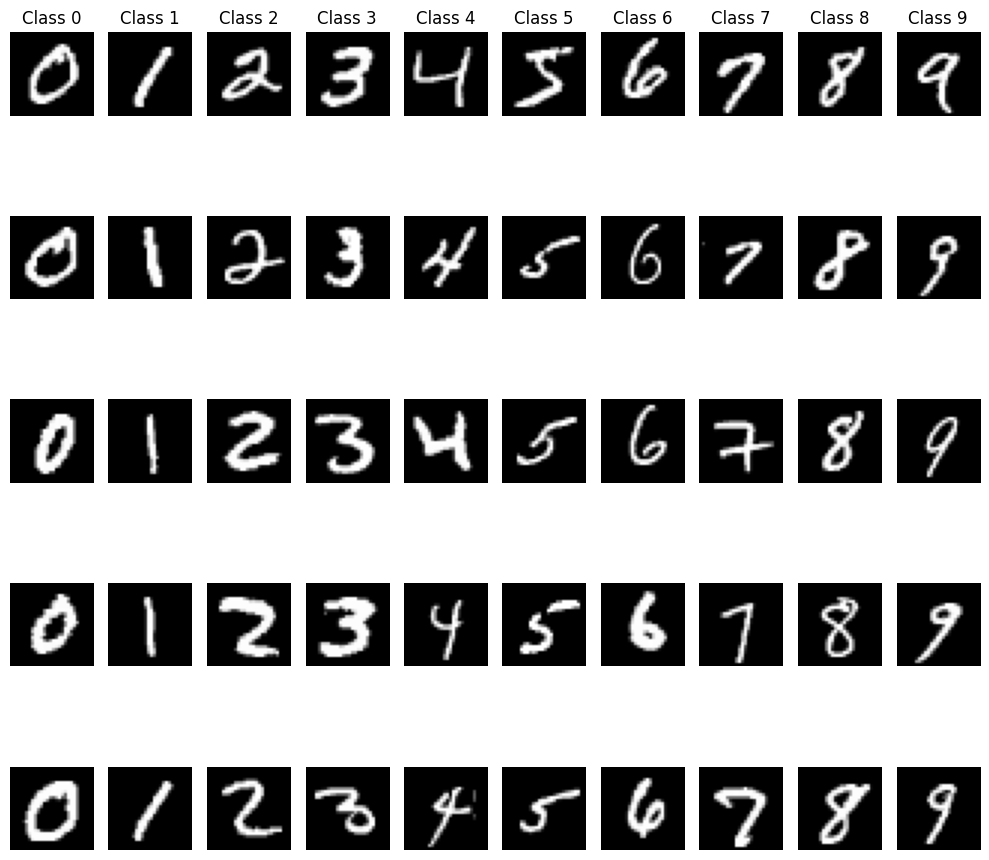

In [ ]:
# Виведемо по 5 зображень кожного класу, щоб подивитися як вони виглядають
images_per_class = 5
num_classes = 10
selected_images = []

for i in range(num_classes):
    class_images = x_train[y_train == i][:images_per_class]
    selected_images.extend(class_images)

fig, axes = plt.subplots(images_per_class, num_classes, figsize=(10, 10))

for i in range(num_classes):
    for j in range(images_per_class):
        axes[j, i].imshow(selected_images[i * images_per_class + j], cmap="gray")
        axes[j, i].axis("off")

    axes[0, i].set_title(f"Class {i}")

plt.tight_layout()
plt.show()

**Creating a Sequential model.**

In [ ]:
# Створюємо модель Sequential
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

**Compiling the model.**

In [ ]:
# Робимо компіляцію моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2481 - accuracy: 0.9275 - val_loss: 0.1290 - val_accuracy: 0.9596
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1032 - accuracy: 0.9683 - val_loss: 0.0937 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0731 - accuracy: 0.9772 - val_loss: 0.0817 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.0707 - val_accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0436 - accuracy: 0.9854 - val_loss: 0.0864 - val_accuracy: 0.9739
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0338 - accuracy: 0.9892 - val_loss: 0.0747 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0933 - val_accuracy:

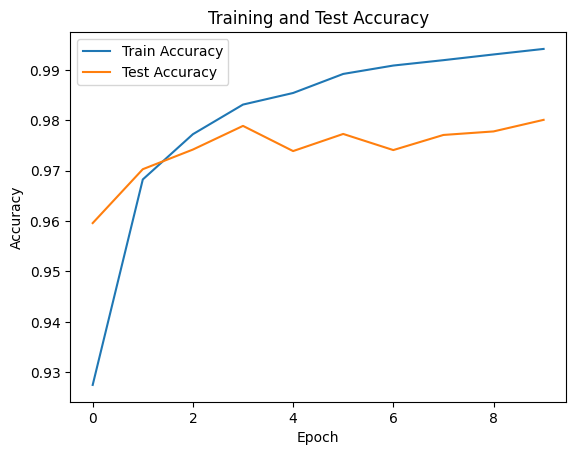

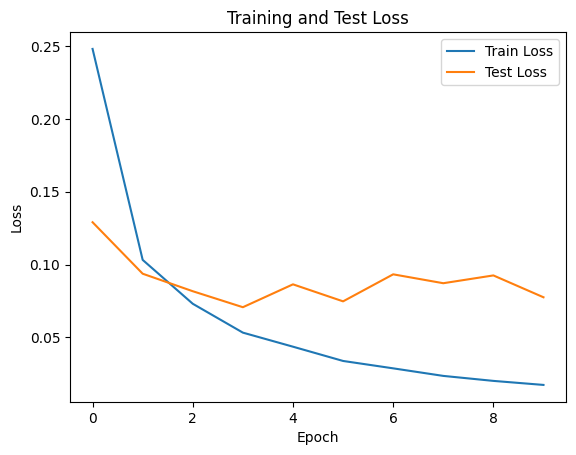

In [ ]:
# Fetching the training and validation accuracy history of the model:
# Отримуємо історію точності моделі навчання та валідації
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

# Fetching the training and validation loss history:
# Отримуємо історію втрат навчання та валідації
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Accuracy plot
# Графік для точності
plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(val_accuracy, label="Test Accuracy")
plt.title("Training and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


# Loss plot
# Графік для втрат
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Test Loss")
plt.title("Training and Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

**Obtaining the model evaluation.**

In [ ]:
# Дивимось оцінку моделі
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print("Accuracy on the test data set: ", val_accuracy)
print("Losses on the test data set: ", val_loss)


313/313 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9801
Accuracy on the test data set:  0.9800999760627747
Losses on the test data set:  0.07751385122537613


**I tried many parameters, but somehow the highest metrics were achieved almost without them. With regularization, the accuracy was 97%, but the loss was around 0.2. So, I reverted to this version.**

In [ ]:
# Перебирала багато параметрів, але чомусь показники найвищі майже без них.
# З регуляризацією точність була 97%, але втрати близько 0.2.
# Тож повернулась до такого варіанту